In [103]:
!where python

C:\Users\daani\Anaconda3\python.exe
C:\Users\daani\AppData\Local\Microsoft\WindowsApps\python.exe


In [104]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
#Standard imports
import os
import pickle
import sys
sys.path.append('..')

#Third-party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.inspection import plot_partial_dependence
from sklearn.metrics import roc_curve

#Local imports
from src.localpaths import *
from src.data.make_dataset import load_training_data
from src.data.make_dataset import load_test_data
from src.models.train_model import store_model_and_results, print_model_results, load_model_results, load_pickled_models

In [4]:
pd.set_option('display.max_columns', 100)

# Load Featurized Data

In [34]:
X_train, y_train = load_training_data(final=True)

In [35]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,0,1,25.30,25.30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,7,1,1,75.15,525.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0,1,4,1,1,20.05,85.50,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,29,1,1,76.00,2215.25,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0,0,3,1,1,75.10,270.70,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Train models

In [36]:
models_to_train = [
    DecisionTreeClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier
]

In [8]:
for model_class in models_to_train:
    print(model_class.__name__)
    model = model_class()
    store_model_and_results(model, X_train, y_train)
    print_model_results(model, X_train, y_train)

DecisionTreeClassifier
fitting model before pickling
saving pickled model to 1779006992822696192.pkl
writing model results to existing results CSV files
accuracy: 0.73


C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


precision: 0.49
recall: 0.50
f1: 0.50
roc_auc: 0.65
AdaBoostClassifier
fitting model before pickling


C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


saving pickled model to 1866644684152677888.pkl
writing model results to existing results CSV files


C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


accuracy: 0.80
precision: 0.65
recall: 0.52
f1: 0.57
roc_auc: 0.84
GradientBoostingClassifier
fitting model before pickling


C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


saving pickled model to 1098485581946604288.pkl
writing model results to existing results CSV files


C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


accuracy: 0.80
precision: 0.66
recall: 0.51
f1: 0.57
roc_auc: 0.84
RandomForestClassifier
fitting model before pickling


..\src\models\train_model.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


saving pickled model to 1117805591751927296.pkl
writing model results to existing results CSV files


C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


accuracy: 0.79
precision: 0.64
recall: 0.46
f1: 0.54
roc_auc: 0.82


# Load model results

In [47]:
model_results = load_model_results()

In [57]:
model_results.sort_values(by='roc_auc', ascending=False)

,accuracy,f1,model_filename,model_string,precision,recall,roc_auc
2,0.802534,0.802534,331554610981076992.pkl,"LogisticRegression(C=1.0, class_weight=None, d...",0.802534,0.802534,0.802534
13,0.801587,0.801587,1098485581946604288.pkl,"GradientBoostingClassifier(ccp_alpha=0.0, crit...",0.801587,0.801397,0.801587
5,0.801397,0.801397,2187006730299694336.pkl,GradientBoostingClassifier(criterion='friedman...,0.801397,0.801587,0.801397
9,0.801397,0.801397,1062571721106432512.pkl,"GradientBoostingClassifier(ccp_alpha=0.0, crit...",0.801587,0.801397,0.801397
4,0.800070,0.800070,609847934726124544.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.800070,0.800070
8,0.800070,0.800070,664390599486068992.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.800070,0.800070
12,0.800070,0.800070,1866644684152677888.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.800070,0.800070
10,0.789660,0.789468,1438406011583622656.pkl,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.787954,0.787388,0.791363
14,0.789849,0.787765,1117805591751927296.pkl,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.789659,0.789281,0.790417
6,0.778868,0.778868,768186897771883008.pkl,"RandomForestClassifier(bootstrap=True, class_w...",0.781331,0.780760,0.780952


# Look at GradientBoostingClassifier

In [58]:
model = load_pickled_models('1062571721106432512.pkl')

In [59]:
most_important_features = sorted(zip(X_train.columns, model.feature_importances_), key=lambda x: x[1], reverse=True)
most_important_features[:10]

[('tenure', 0.3190925934893095),
 ('InternetService_Fiber optic', 0.19806153093597761),
 ('PaymentMethod_Electronic check', 0.08870162290313499),
 ('Contract_Two year', 0.0781695045486789),
 ('MonthlyCharges', 0.07135560663592695),
 ('TotalCharges', 0.06675824432644081),
 ('Contract_One year', 0.05840128163304557),
 ('OnlineSecurity_Yes', 0.021299199687001356),
 ('PaperlessBilling', 0.016302800480311498),
 ('StreamingMovies_Yes', 0.011331424388014774)]

# Look at partial dependence plots
We are going to look at these plots to determine the direction of influence of each of these features.

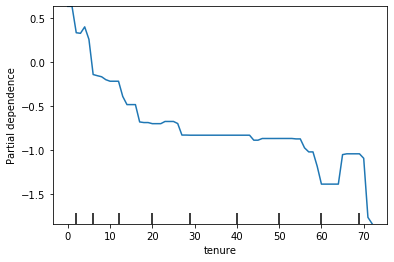

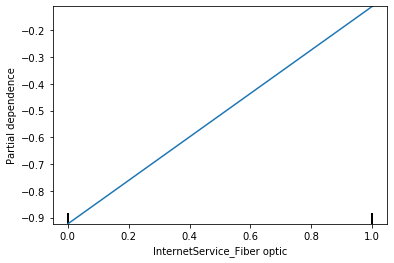

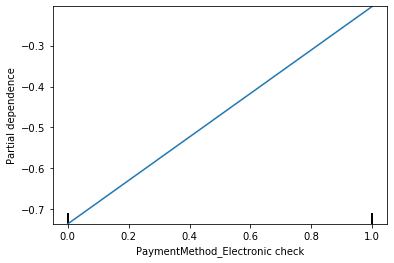

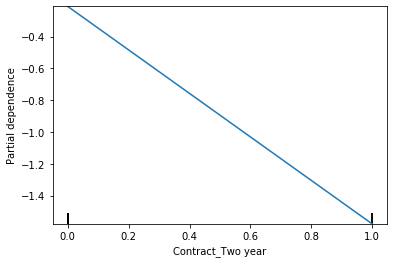

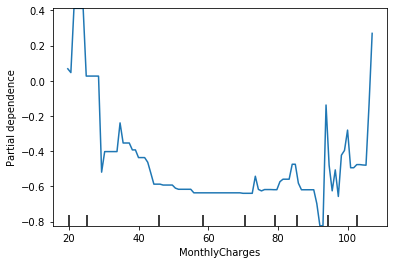

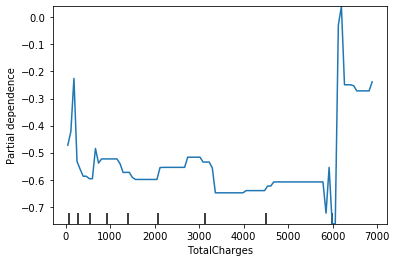

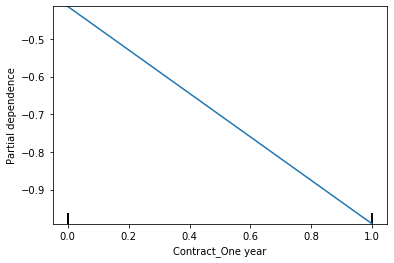

In [60]:
for col, _ in most_important_features[:7]:
    plot_partial_dependence(model, X_train, [col])

# Visualize model training
In this section, we are going to use learning curves to visualize the training of our models to explore overfitting and underfitting

## Learning Curves

In [61]:
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train)

C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A 

In [62]:
train_sizes

array([ 422, 1373, 2323, 3274, 4225])

In [67]:
train_scores=np.mean(train_scores, axis=1)

In [68]:
test_scores=np.mean(test_scores, axis=1)

(0, 1)

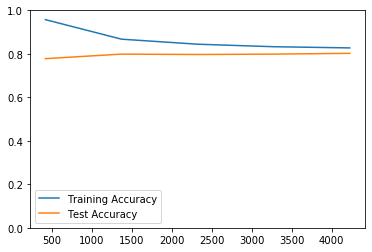

In [73]:
plt.plot(train_sizes, train_scores, label='Training Accuracy')
plt.plot(train_sizes, test_scores, label='Test Accuracy')
_ = plt.legend()
plt.ylim(0,1)

# Inspect a classic case of overfitting

In [75]:
dt = load_pickled_models('1756373218170905600.pkl')

In [76]:
train_sizes, train_scores, test_scores = learning_curve(dt, X_train, y_train)
train_scores=np.mean(train_scores, axis=1)
test_scores=np.mean(test_scores, axis=1)

(0, 1.05)

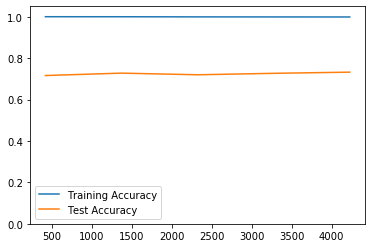

In [78]:
plt.plot(train_sizes, train_scores, label='Training Accuracy')
plt.plot(train_sizes, test_scores, label='Test Accuracy')
_ = plt.legend()
plt.ylim(0,1.05)

# Visualize model results

In this section, we're going to use**ROC curves** to visualize the overall performance of our models

## ROC curves

In [87]:
X_train_subset, X_validation, y_train_subset, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [88]:
model.fit(X_train_subset, y_train_subset)

C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [90]:
y_score = model.predict_proba(X_validation)
y_score = y_score[:,1]

In [91]:
fpr, tpr, thresholds = roc_curve(y_validation, y_score)

### Plot ROC curve for Gradient Boosting Classifier

Text(0.5, 0.98, 'ROC Curve - GradientBoostingClassifier')

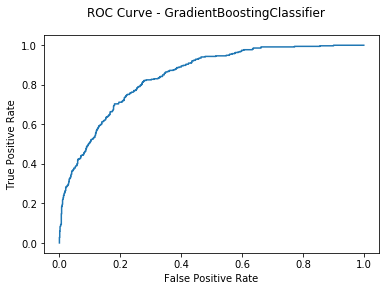

In [94]:
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.suptitle(f"ROC Curve - {type(model).__name__}")

In [96]:
thresholds[np.where(tpr > 0.9)[0][0]]

0.1493194891941612

In [97]:
fpr[np.where(tpr > 0.9)[0][0]]

0.41468459152016546

### Plot ROC curves for all of our models

In [ ]:
X_train_subset, X_validation, y_train_subset, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


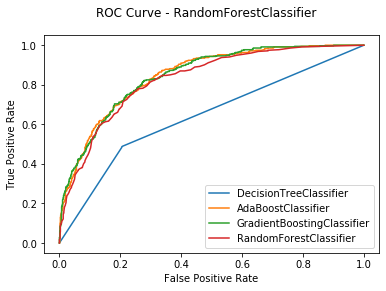

In [102]:
for model_class in models_to_train:
    model = model_class()
    model.fit(X_train_subset, y_train_subset)
    y_score = model.predict_proba(X_validation)
    y_score = y_score[:, 1]
    fpr, tpr, thresholds = roc_curve(y_validation, y_score)
    plt.plot(fpr, tpr, label=f"{type(model).__name__}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.suptitle(f"ROC Curve - {type(model).__name__}")
    
_ = plt.legend()